In [1]:
## Importing Libraries ####

# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [2]:
### read the train dataset and show the top 5 row of the dataset

df_Agr_train = pd.read_excel(r"C:/Users/HP/Desktop/dataset/train_agriculture.xlsx")
df_Agr_train.head()


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
### read the train dataset and show the last 5 row of the dataset

df_Agr_train = pd.read_excel(r"C:/Users/HP/Desktop/dataset/train_agriculture.xlsx")
df_Agr_train.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0
4598,F00008083,2267,0,1,2,10,33.0,17,2,0


In [4]:
### read the test dataset and show the top 5 row of the dataset

df_Agr_test = pd.read_excel(r"C:/Users/HP/Desktop/dataset/test_agriculture.xlsx")
df_Agr_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
## basic statistical info 

df_Agr_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


#### Here we can check that attribute (Number_Weeks_Used) is count less as compare to other that mean some missing value present is the dataset

In [6]:
## check the datatype and other info

df_Agr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
df_Agr_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [8]:
###### check the unique value of the data set 
df_Agr_train.apply(lambda x: len(x.unique()))

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            64
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

#### here we find that some featuer are in the categorical value  (Crop_Type,Soil_Type. Season,Crop_Damage,Pesticide_Use_Category    ) 

##  Preprocessing the dataset

In [9]:
## Let’s take a more detailed look at what data is actually missing in the train data set and the precentage of it  

total = df_Agr_train.isnull().sum().sort_values(ascending=False)

percent_1 = df_Agr_train.isnull().sum()/df_Agr_train.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(8)

,Total,%
Number_Weeks_Used,442,9.6
Crop_Damage,0,0.0
Season,0,0.0
Number_Weeks_Quit,0,0.0
Number_Doses_Week,0,0.0
Pesticide_Use_Category,0,0.0
Soil_Type,0,0.0
Crop_Type,0,0.0


### here we fine that the missing value present in the (Number_Weeks_Used) attribute 

In [10]:
## Let’s take a more detailed look at what data is actually missing in the test data set and the precentage of it  

total = df_Agr_test.isnull().sum().sort_values(ascending=False)

percent_1 = df_Agr_test.isnull().sum()/df_Agr_test.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(8)

,Total,%
Number_Weeks_Used,119,9.9
Season,0,0.0
Number_Weeks_Quit,0,0.0
Number_Doses_Week,0,0.0
Pesticide_Use_Category,0,0.0
Soil_Type,0,0.0
Crop_Type,0,0.0
Estimated_Insects_Count,0,0.0


### Here we can see that missing value present in the "Number_Weeks_Used" , around 10% 

In [11]:
df_Agr_train[df_Agr_train.Pesticide_Use_Category == 1].Number_Weeks_Used.count()

40

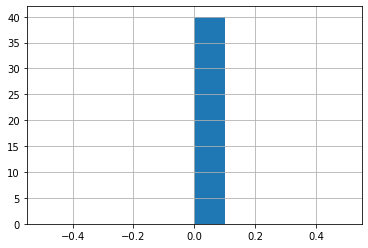

In [12]:
df_Agr_train[df_Agr_train.Pesticide_Use_Category == 1].Number_Weeks_Used.hist()


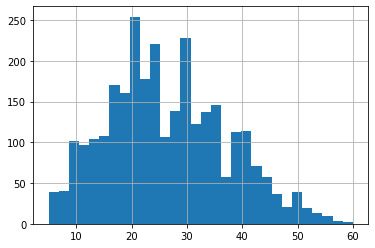

In [13]:
df_Agr_train[df_Agr_train.Pesticide_Use_Category == 2].Number_Weeks_Used.hist(bins=30)

In [14]:
df_Agr_train[df_Agr_train.Pesticide_Use_Category == 2].Number_Weeks_Used.count()

2904

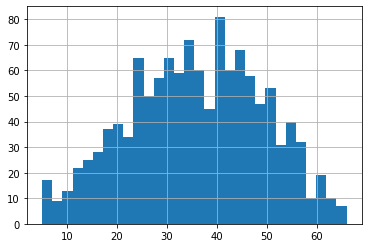

In [15]:
df_Agr_train[df_Agr_train.Pesticide_Use_Category == 3].Number_Weeks_Used.hist(bins=30)

In [16]:
df_Agr_train[df_Agr_train.Pesticide_Use_Category == 3].Number_Weeks_Used.count()

1213

In [17]:
df_Agr_train.shape, df_Agr_test.shape

((4599, 10), (1199, 9))

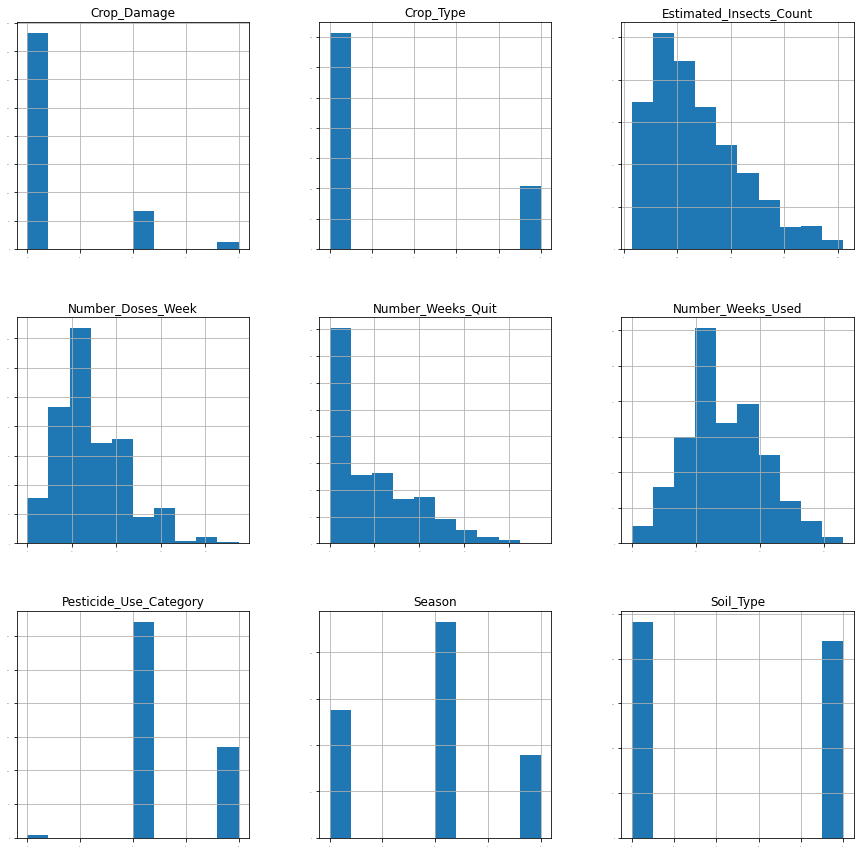

In [37]:
# Unimodal Hist Visualization
df_Agr_train.hist(sharex=False,sharey=False,figsize=(15,15), xlabelsize=1, ylabelsize=1)
plt.show()

### Filling the null values in Number_Weeks_Used column

In [18]:
df_Agr_train['Number_Weeks_Used'] = df_Agr_train['Number_Weeks_Used'].fillna(df_Agr_train.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))

df_Agr_test['Number_Weeks_Used'] = df_Agr_test['Number_Weeks_Used'].fillna(df_Agr_test.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))

In [19]:
df_Agr_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [20]:
df_Agr_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

### As we check the there is not null value present in the data set 

In [21]:
### Spiting the data sets 

training_labels = df_Agr_train.iloc[:, -1]
X_train = df_Agr_train.iloc[:, 1:-1]
X_test = df_Agr_test.iloc[:, 1:]

In [22]:
X_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


In [23]:
X_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,0.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [24]:
## check the shape of the data set 

X_train.shape, X_test.shape

((4599, 8), (1199, 8))

In [25]:
### now add the both datasets 

data = pd.concat([X_train, X_test])


### OneHotEncoding for "Pesticide_Use_Category" and "Season"

In [26]:
columns_names_encod = data.columns[[3, 7]]
data = pd.get_dummies(data, columns=columns_names_encod)


In [27]:
data.shape

(5798, 12)

## Splitting the data back

In [28]:
final_train = data[:df_Agr_train.shape[0]]
final_test = data[df_Agr_train.shape[0]:]

In [29]:
final_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,1,0,0,0.0,0,1,0,0,1,0,0
1,209,1,0,0,0.0,0,1,0,0,0,1,0
2,257,1,0,0,0.0,0,1,0,0,0,1,0
3,257,1,1,0,0.0,0,1,0,0,0,1,0
4,342,1,0,0,0.0,0,1,0,0,0,1,0


In [30]:
final_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,1,1,0,0.0,0,1,0,0,0,1,0
1,410,1,1,0,0.0,0,1,0,0,0,1,0
2,626,1,0,0,0.0,0,1,0,0,0,1,0
3,731,1,0,0,0.0,0,1,0,0,0,1,0
4,789,0,0,0,0.0,0,1,0,0,1,0,0


## Scaling the numerical variables

In [31]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

final_train.iloc[:, [0, 3, 4, 5]] = sc.fit_transform(final_train.iloc[:, [0, 3, 4, 5]])

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:

final_test.iloc[:, [0, 3, 4, 5]] = sc.transform(final_test.iloc[:, [0, 3, 4, 5]])

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Creating cross validation set

In [33]:
training_labels.value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_training, X_cv, y_training, y_cv = train_test_split(final_train, training_labels, test_size =0.2, random_state=21)

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)

clf.fit(X_training, y_training)
y_training_pred = clf.predict(X_training)
y_cv_pred = clf.predict(X_cv)

#### Checking accuracy score for training dataset and cross validation set

In [36]:

from sklearn.metrics import accuracy_score
training_accuracy_score = accuracy_score(y_training, y_training_pred)
cv_accuracy_score = accuracy_score(y_cv, y_cv_pred)

print(training_accuracy_score)
print(cv_accuracy_score)

0.8328350095134548
0.8293478260869566
